<a href="https://colab.research.google.com/github/bryantanwz/toy-projects/blob/main/LSTM_StockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf

In [3]:
stock_data = yf.download('DAC', start='2014-02-21', end='2024-02-21')
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-21,86.800003,90.440002,86.379997,88.199997,77.498634,1179
2014-02-24,88.339996,90.440002,86.660004,89.599998,78.728775,2021
2014-02-25,89.599998,90.160004,86.660004,88.480003,77.744659,1571
2014-02-26,89.320000,89.739998,86.800003,89.040001,78.236725,1600
2014-02-27,88.199997,89.320000,85.120003,87.360001,76.760567,2164
...,...,...,...,...,...,...
2024-02-13,75.989998,76.440002,74.970001,75.449997,73.994164,110400
2024-02-14,72.650002,74.949997,72.019997,72.570000,71.169739,189800
2024-02-15,72.360001,72.849998,71.660004,72.040001,70.649971,128700


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(stock_data["Close"].values.reshape([-1,1]))

In [7]:
import numpy as np
def create_dataset(data, time_step):
  X, y = [], []
  for i in range(len(data) - time_step - 1):
    X.append(data[i:(i+time_step), 0]) # X is all the values leading up to y value
    y.append(data[i+time_step, 0]) # y value is just the y value
  return np.array(X), np.array(y)

In [11]:
time_step = 25
X , y = create_dataset(scaled_data, time_step)

In [12]:
train_size = 0.8
X_train, X_test = X[:int(X.shape[0]*train_size)], X[int(X.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(64))
model.add(Dense(64))
model.add(Dense(1))

In [15]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
32/32 [==============================] - 9s 37ms/step - loss: 0.0197
Epoch 2/10
32/32 [==============================] - 1s 37ms/step - loss: 0.0015
Epoch 3/10
32/32 [==============================] - 1s 37ms/step - loss: 0.0012
Epoch 4/10
32/32 [==============================] - 1s 37ms/step - loss: 0.0011
Epoch 5/10
32/32 [==============================] - 1s 37ms/step - loss: 0.0011
Epoch 6/10
32/32 [==============================] - 1s 37ms/step - loss: 0.0010
Epoch 7/10
32/32 [==============================] - 1s 45ms/step - loss: 0.0010
Epoch 8/10
32/32 [==============================] - 2s 59ms/step - loss: 9.4102e-04
Epoch 9/10
32/32 [==============================] - 2s 55ms/step - loss: 9.2792e-04
Epoch 10/10
32/32 [==============================] - 1s 38ms/step - loss: 9.0440e-04


In [17]:
test_loss = model.evaluate(X_test, y_test)
test_loss

16/16 [==============================] - 2s 11ms/step - loss: 0.0013


0.001287116319872439

In [21]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 0s 21ms/step


In [24]:
original_data = stock_data["Close"].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)

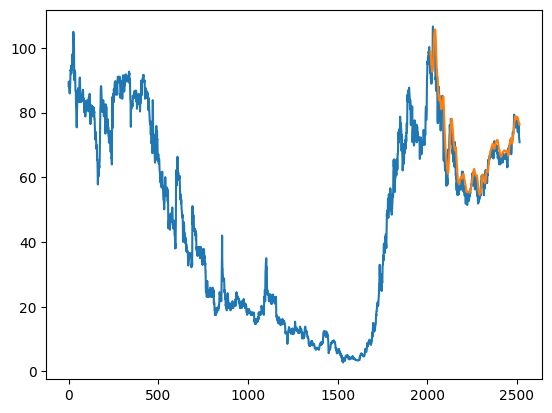

In [25]:
import matplotlib.pyplot as plt
plt.plot(original_data)
plt.plot(predicted_data)

3/3 [==============================] - 0s 10ms/step


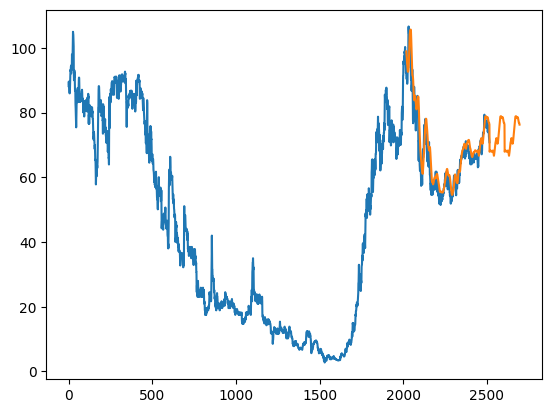

In [28]:
new_predictions = model.predict(X_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)
predicted_data = np.append(predicted_data, new_predictions)
plt.plot(original_data)
plt.plot(predicted_data)